In [54]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa

In [147]:
# Load the audio file
def audio_graph_plot(file_path):
    y, sr = librosa.load(file_path,sr=None) 
    # Takes the file path and Sampling Rate(sr), default sr=22050 and returns y(np.array of amplitude) , sr) 
#     print("Total Samples:",y)
#     print("Total Samples:",len(y))
#     print("Total Sampling rate:",sr)
    # Plot the waveform
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(y, sr=sr) # displays waveform in time domain
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Plot the spectrogram
    plt.figure(figsize=(14, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    '''
    librosa.stft(y): Computes the Short-Time Fourier Transform of the audio signal,
    resulting in a complex-valued matrix representing the frequency content over time.

    np.abs(librosa.stft(y)): Converts the complex STFT matrix to a real-valued magnitude (amplitude) spectrum, 
    representing the strength of each frequency component over time.

    librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max): Converts the amplitude spectrum to a decibel (dB) scale using the maximum value as the reference, 
    normalizing the data and making it more suitable for visualization. 20log10(mag/ref)
    '''
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log') # Spectrogram Representation
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()
#     return y


ORIGINAL AUDIO 


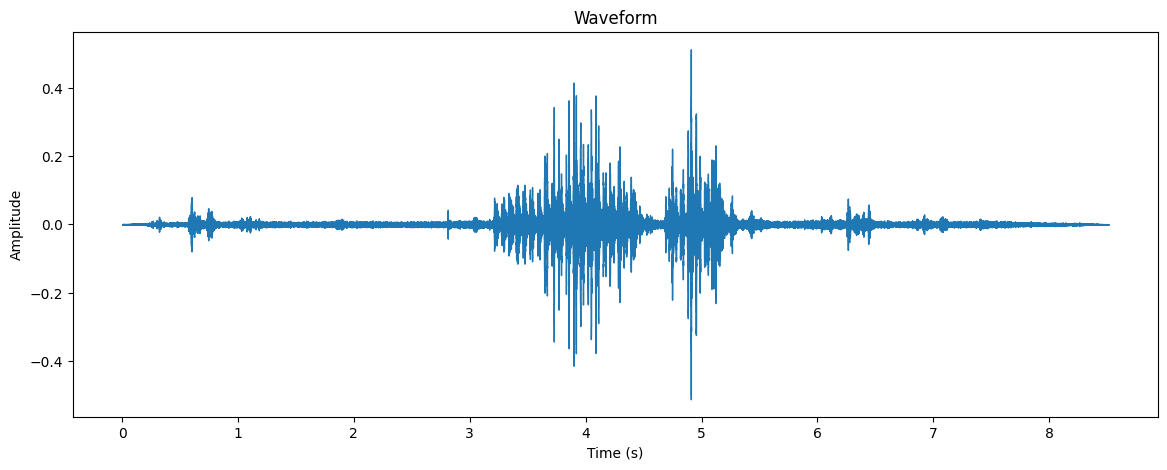

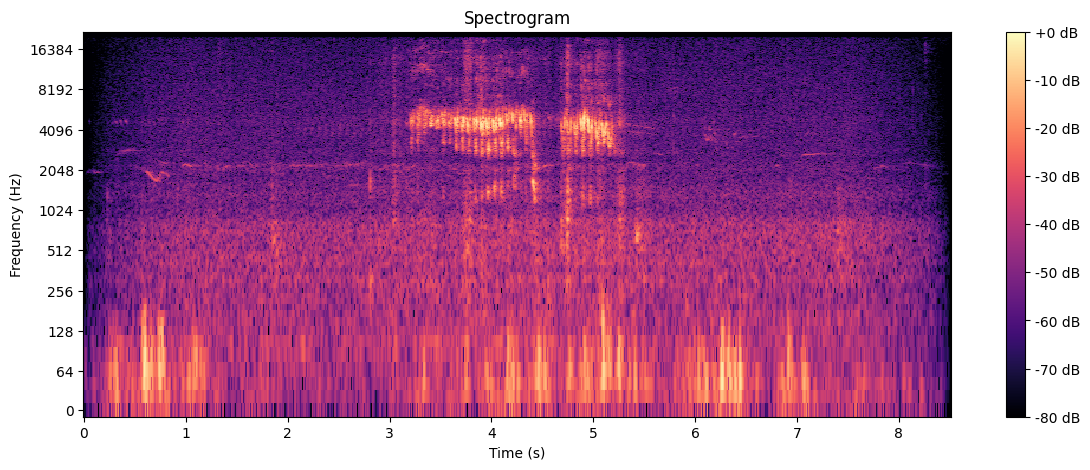

In [148]:
print("ORIGINAL AUDIO ")
audio_graph_plot('vulture.mp3')


In [149]:
def remove_silence(audio, window_size=70000, threshold=0.5):
    global_mean = np.mean(audio)
    start = 0
    end = len(audio) - 1
    print("Global mean",global_mean)

    # Process from start
    while start < end:
        local_mean = np.mean(np.abs(audio[start:start+window_size]))
        print("Local mean from start",local_mean)
        if local_mean < global_mean * threshold:
            start += window_size
        else:
            break

    # Process from end
    while end > start:
        local_mean = np.mean(np.abs(audio[end-window_size:end]))
#         print("Local mean from end",local_mean)
        if local_mean < global_mean * threshold:
            end -= window_size
        else:
            break

    return audio[start:end]

# numpy array
audio_file = 'vulture.mp3'
audio_array,sr= librosa.load(audio_file,sr=None)

# silence removal custom function
cleaned_audio_array = remove_silence(audio_array)
# Silence removal using librosa.effects.trim
cleaned_audio_array_librosa, _ = librosa.effects.trim(audio_array, top_db=10.5)

# # exporting cleaned audio:
output_file_path = 'cleaned_audio.mp3'
# sf.write(output_file_path,cleaned_audio_array,sr)
# # Exporting cleaned audio using librosa.effects.trim
output_file_path_librosa = 'cleaned_audio_librosa.mp3'
# sf.write(output_file_path_librosa, cleaned_audio_array_librosa, sr)

print(f"Original audio length: {len(audio_array)} samples")
print(f"Cleaned audio length: {len(cleaned_audio_array)} samples")
print(f"Cleaned audio length (librosa): {len(cleaned_audio_array_librosa)} samples")

Global mean -3.63935e-07
Local mean from start 0.0038514342
Original audio length: 375412 samples
Cleaned audio length: 375411 samples
Cleaned audio length (librosa): 78848 samples


In [150]:
375412/10

37541.2

Cleaned Audio Using Manual Function


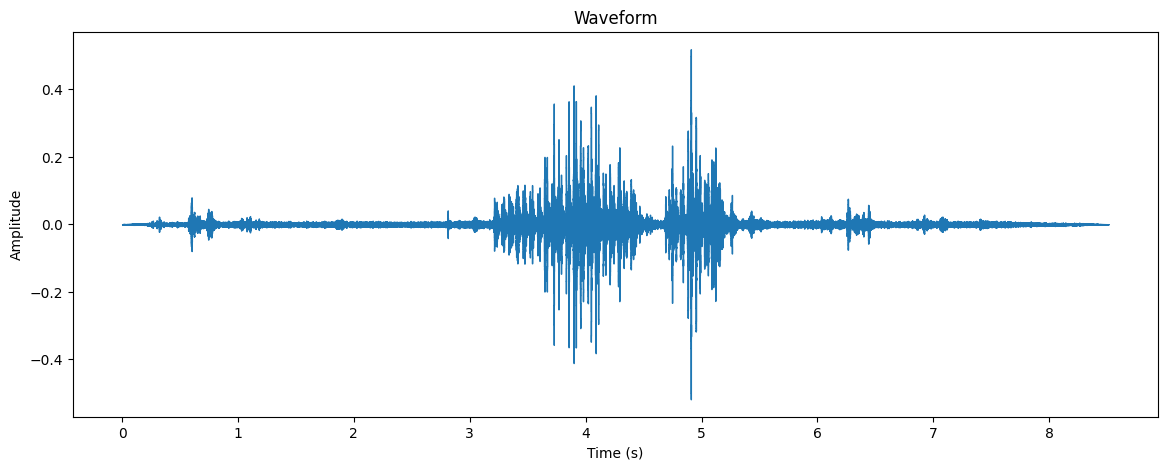

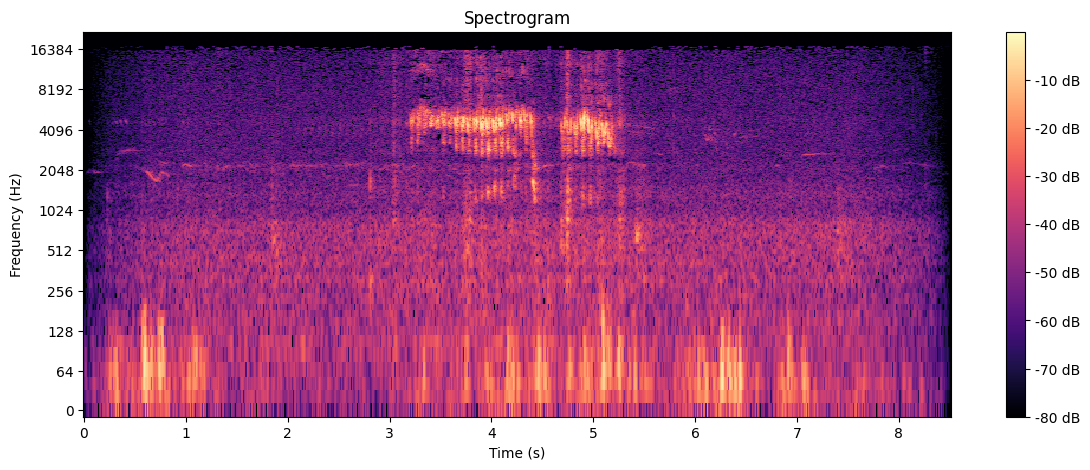

In [151]:
print("Cleaned Audio Using Manual Function")
audio_graph_plot('cleaned_audio.mp3')

Cleaned Audio Using Librosa


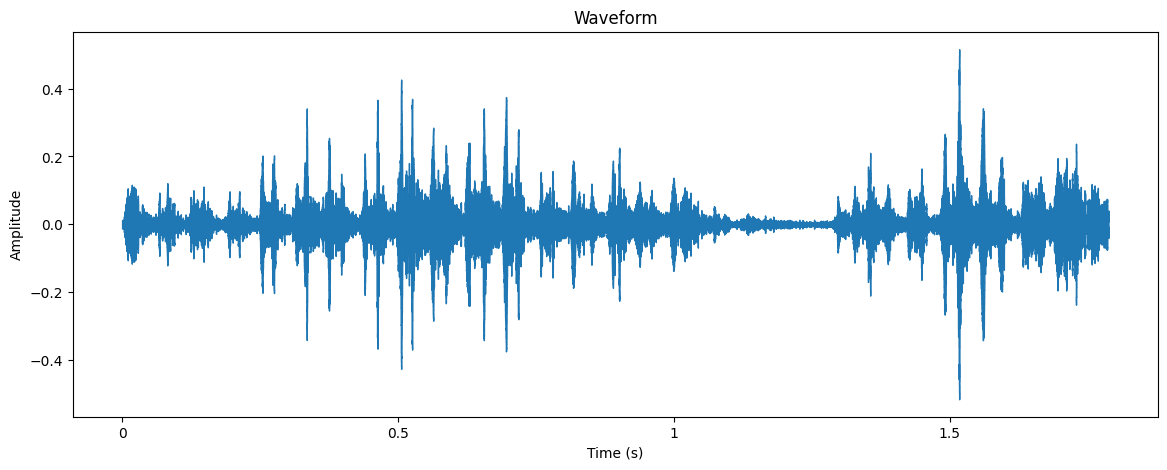

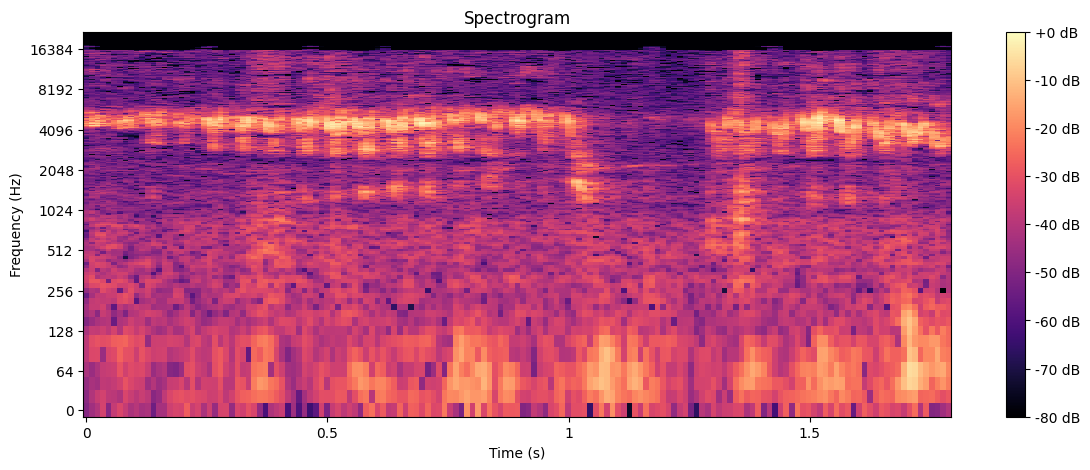

array([ 0.00765734,  0.00846617,  0.00824083, ..., -0.01223496,
       -0.01252663, -0.00813841], dtype=float32)

In [146]:
print("Cleaned Audio Using Librosa")
audio_graph_plot('cleaned_audio_librosa.mp3')